### **Optimizing documnet retrival**
- 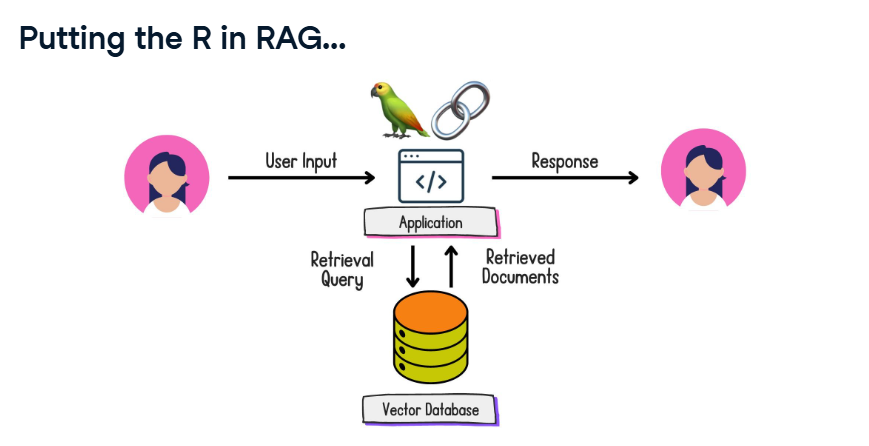
- The above retrival is dense retrival
- Dense retrival encodes chunks as a single vector with non zero components.
- excles at caputuring semantic meaning
- computationally expensive
- **Sparse**
    - Encode using word matching with mostly zero components.
    - sparse retrival allows for precise, explainable, rare-word handelling
    - Sparse retrival are less genrizability

**Tf-IDF**
- encodes doucuments using the words that make the document unique
----------
**BM25**
- Helps mitigate the high frequency words form saturating the encoding.


In [3]:
from langchain_community.retrievers import BM25Retriever
chunks=[
    "Python was created by Guido van Russon and released in 1991.",
    "Python is a popular language for machine learning(ML).",
    "The pytorch library is popular python library for AI and ML"
]
bm25retriever=BM25Retriever.from_texts(chunks,k=3)
#k value sets the number of the items returned by the retreiver when invoked.


In [5]:
results=bm25retriever.invoke("When was the Python created?")
print("Most relevant documents")
print(results[0].page_content)

Most relevant documents
Python was created by Guido van Russon and released in 1991.


- BM25retirval retrives the statement with similar terms to the input that were also unique to the other statements.

In [33]:
from langchain_community.document_loaders import PyPDFLoader
loader=PyPDFLoader("C:/Users/Acer/OneDrive/Documents/books/read/DAta sceince/ISLP_website.pdf")

In [34]:
data=loader.load()

Ignoring wrong pointing object 185 0 (offset 0)
Ignoring wrong pointing object 421 0 (offset 0)
Ignoring wrong pointing object 423 0 (offset 0)
Ignoring wrong pointing object 430 0 (offset 0)
Ignoring wrong pointing object 643 0 (offset 0)
Ignoring wrong pointing object 860 0 (offset 0)
Ignoring wrong pointing object 892 0 (offset 0)
Ignoring wrong pointing object 894 0 (offset 0)
Ignoring wrong pointing object 928 0 (offset 0)
Ignoring wrong pointing object 1047 0 (offset 0)
Ignoring wrong pointing object 1124 0 (offset 0)
Ignoring wrong pointing object 1138 0 (offset 0)
Ignoring wrong pointing object 1148 0 (offset 0)
Ignoring wrong pointing object 1173 0 (offset 0)
Ignoring wrong pointing object 1380 0 (offset 0)
Ignoring wrong pointing object 1405 0 (offset 0)
Ignoring wrong pointing object 1468 0 (offset 0)
Ignoring wrong pointing object 1520 0 (offset 0)
Ignoring wrong pointing object 1578 0 (offset 0)
Ignoring wrong pointing object 1670 0 (offset 0)
Ignoring wrong pointing objec

In [35]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(
    model_name='sentence-transformers/all-MiniLM-L6-v2'
)

In [36]:
semnatic_spliter=SemanticChunker(
    embeddings=embeddings,
    breakpoint_threshold_type='gradient',
    breakpoint_threshold_amount=0.8
)


In [37]:
chunks=semnatic_spliter.split_documents(data)

In [38]:
retriever=BM25Retriever.from_documents(
    chunks,
    k=5
)

In [39]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template("""
Use the following pieces of context to answer the question at the end.
If you do not know the answer, say that you do not know.

Context: {context}

Question: {question}

Answer:
""")

In [40]:
from langchain_groq import ChatGroq
import os

os.environ['GROQ_API_KEY'] = "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"  # Replace with your actual key
llm = ChatGroq(model="llama-3.3-70b-versatile", temperature=0)

In [41]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from operator import itemgetter

In [42]:
chain=(
    {
        "context":retriever,"question":RunnablePassthrough()
    }
    |prompt
    |llm
    |StrOutputParser()
)

In [43]:
print(chain.invoke("What is smoothing splines?"))

I do not know. The provided context does not mention "smoothing splines". It appears to be a collection of questions related to data science and statistics, but it does not provide a definition or explanation of smoothing splines.
